# Cartopy
For today's class, we will make maps using the [WOA data product](https://www.ncei.noaa.gov/access/world-ocean-atlas-2018/) we accessed last class. To find the url you can use to load one of these datasets in your Notebook:
- click on the data of interest (temperature, salinity, oxygen, etc.)
- select NetCDF
- click on one of the desired filename 
- follow the OPeNDAP link
- copy the URL in the box (this page also shows the variables in the file)

For this class, I selected annual averages of temperature and dissolved oxygen gridded at 1$^\circ$.

In [30]:
# Import relevant modules
import numpy as np
import scipy as sp
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt 

In [31]:
# Disable warnings 
import warnings
warnings.filterwarnings("ignore")

# Note that I do not recommend disabling warnings but 
# cartopy has an issue that keeps giving warnings and
# it clutters the notebook.

In [32]:
# WOA url
t_url = ("https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/temperature/decav/1.00/woa18_decav_t00_01.nc")
o_url = ("https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/oxygen/all/1.00/woa18_all_o00_01.nc")

In [33]:
# Open data
t = xr.open_dataset(t_url, decode_times=False)
o = xr.open_dataset(o_url, decode_times=False)

Text(0.5, 1.0, 'My sampling location')

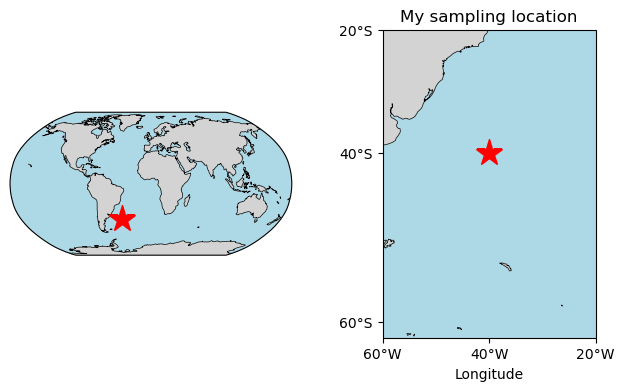

In [34]:
# Create a world map and zoomed in map together
# Create a figure
fig = plt.figure(figsize=(8,4))

# Create a subplot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Robinson(central_longitude=0))

ax1.coastlines(lw=0.5)

# ax1.stock_img()

ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')

ax1.plot(-40, -40, 'r*', markersize=20, transform=ccrs.PlateCarree())

ax1.set_global()


# Create a subplot
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Mercator(central_longitude=0))

ax2.coastlines(lw=0.5)

# ax1.stock_img()

ax2.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax2.add_feature(cfeature.LAND, facecolor='lightgrey')

ax2.plot(-40, -40, 'r*', markersize=20, transform=ccrs.PlateCarree())

# ax2.set_global()
ax2.set_extent([-60, -20, -60, -20])

# Add ticks
ax2.set_xticks(np.arange(-60,-10,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)

ax2.set_yticks(np.arange(-60,-10,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax2.yaxis.set_major_formatter(lat_formatter)

ax2.set_xlabel('Longitude')
ax2.set_title('My sampling location')


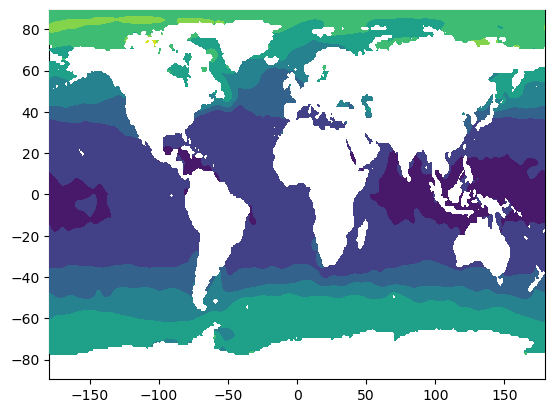

In [35]:
# Simple plot of the oxygen data at depth = 0 and first time step
plt.contourf(o.lon, o.lat, o.o_an.sel(depth=0).isel(time=0), zorder=10)

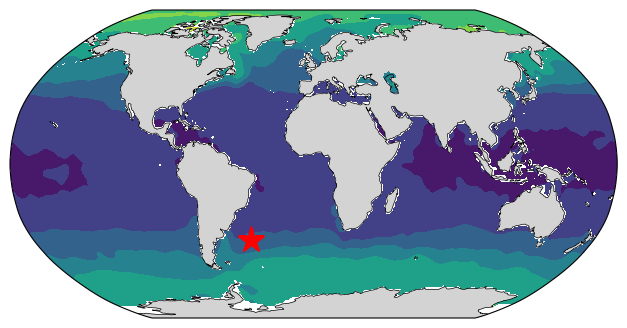

In [36]:
# Example of how this data could be added to a Cartopy map
# Create a figure
fig = plt.figure(figsize=(8,4))

# Create a subplot
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=0))

ax1.coastlines(lw=0.5)

# ax1.stock_img()

# ax1.add_feature(cfeature.OCEAN, facecolor='pink')
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')

ax1.plot(-40, -40, 'r*', markersize=20, transform=ccrs.PlateCarree(), zorder=2)
ax1.contourf(o.lon, o.lat, o.o_an.sel(depth=0).isel(time=0), zorder=1, transform=ccrs.PlateCarree())

ax1.set_global()

# ax1.set_extent([-70,-20,-60,-20])

## Additional options not (yet) seen in class 

The module xarray can be used to slice part of a data set

In [37]:
# Slice the entire t dataset
t2 = t.sel(lat=slice(-30,30), lon=slice(-50,50))

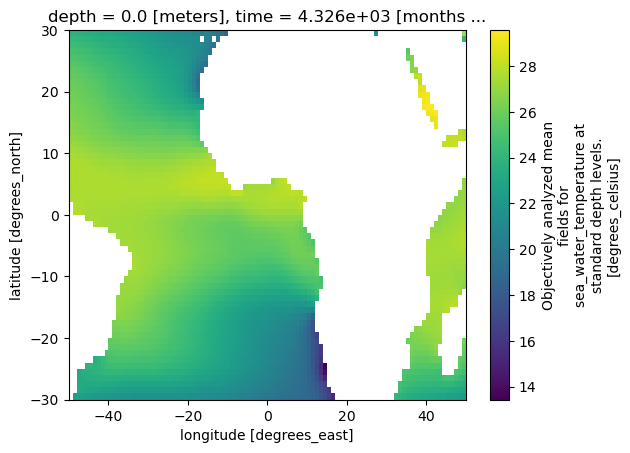

In [38]:
# Show the new default plot
t2.t_an.sel(depth=0).plot()

Can this sliced dataset be added on a map?

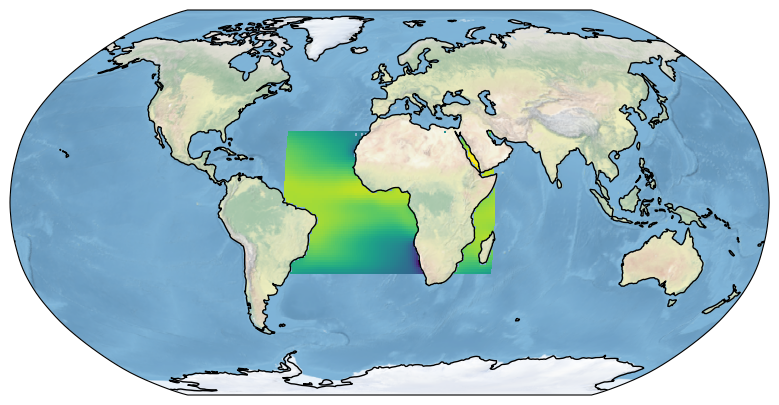

In [39]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.set_global()

ax.stock_img()
ax.coastlines()

ax.pcolormesh(t2.lon, t2.lat, t2.t_an.sel(depth=0).isel(time=0), transform=ccrs.PlateCarree())

plt.show()


What about with a different projection, and a LAND feature?

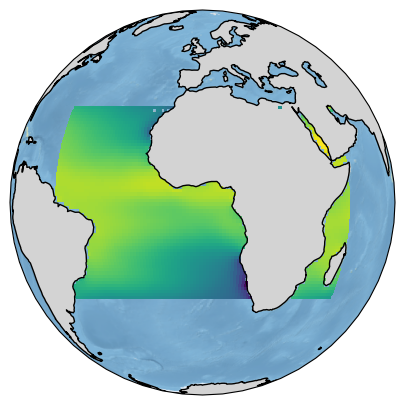

In [40]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgrey', zorder=1)

ax.pcolormesh(t2.lon, t2.lat, t2.t_an.sel(depth=0).isel(time=0), transform=ccrs.PlateCarree())

plt.show()

I am also included a very automated script I nerded out on with transparent (alpha = 0.5; note that alpha is often used for opacity) land and the `cividis` colormap so it looks like sun is shining on the Earth. The hourly data mean surface downward short-wave radiation flux (clear sky) data for September 22, 2022 was taken from ERA5 through the [Copernicus](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels) portal (signing up is free and quick).

You could try downloading the data for another day. I chose the Autumnal Equinox, but the Solstices would also be interesting. I like seeing that the solar radiation reaching the equator is stronger than towards the pole, even if all days across the globe are ~12-hour long on that day.

In [41]:
ds = xr.open_dataset('ERA5_msdwswrfcs_hourly_025deg_22Sep2022.nc')

'1/12 plots completed...'

'2/12 plots completed...'

'3/12 plots completed...'

'4/12 plots completed...'

'5/12 plots completed...'

'6/12 plots completed...'

'7/12 plots completed...'

'8/12 plots completed...'

'9/12 plots completed...'

'10/12 plots completed...'

'11/12 plots completed...'

'12/12 plots completed...'

Text(0.5, 1.05, 'Daylight on September 22 2022')

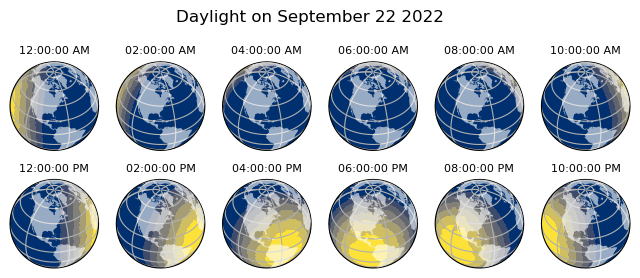

In [42]:
# Create a figure and set its size
fig = plt.figure(figsize=(8, 2.8))

# Starting subplot
iplot = 1

# Set the index of the time points to plot
prange = np.arange(0, 24, 2)

for itime in prange:
    # Create the appropriate subplot
    ax = plt.subplot(2, int(len(prange)/2), iplot, projection=ccrs.Orthographic(-80,40))
    
    # Add the data using a contour plot
    ax.contourf(ds.longitude, ds.latitude, ds.msdwswrfcs.isel(time=itime), 
                transform=ccrs.PlateCarree(), cmap='cividis', vmin=0, vmax=1000)
    
    # Add the land feature, set zorder to 10 so it rises above the data
    ax.add_feature(cartopy.feature.LAND, zorder=10, facecolor='white', alpha=0.6)
    
    # Set subplot title
    ax.set_title(ds["time"].isel(time=itime).dt.strftime("%r").values, fontsize=8)

    # Global map
    ax.set_global()
    
    # Add gridlines
    ax.gridlines()
    
    # Display the number of plots completed
    display(str(iplot) + '/' + str(len(prange)) + ' plots completed...')
    
    # Index to the next subplot
    iplot += 1

# Add a title for the entire figure
fig.suptitle('Daylight on ' + ds["time"].isel(time=itime).dt.strftime("%B %d %Y").values, y=1.05)